<a href="https://colab.research.google.com/github/Denchil-RPG/Machine/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

# Подключение Google Drive
drive.mount('/content/drive')

pd.set_option('display.max_columns', None)

# Обзор столбцов для понимания структуры
def overview(df, name):
    print(f"\n--- Обзор датасета {name} ---")
    print(df.info())
    print(df.describe())
    print(f"Примеры данных:\n{df.head()}\n")

Mounted at /content/drive


In [ ]:
!pip install rapidfuzz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 31.9 MB/s eta 0:00:00


In [ ]:

import pandas as pd
from rapidfuzz import process

#Загрузка датасета один раз
dataset = pd.read_csv('/content/drive/My Drive/id-name.csv')

# Приведение к единому формату
dataset['name_normalized'] = dataset['name'].str.lower().str.strip()

def get_name_by_appid(appid):
    """Получение имени игры по AppID"""
    row = dataset.loc[dataset['AppID'] == appid]
    if not row.empty:
        return row.iloc[0]['name']
    return None

def get_appid_by_name(name):
    """Получение AppID игры по имени (с нечётким поиском)"""
    name_normalized = name.lower().strip()
    match = process.extractOne(name_normalized, dataset['name_normalized'])
    if match and match[1] > 80:  # Порог точности (например, 80%)
        row = dataset.loc[dataset['name_normalized'] == match[0]]
        if not row.empty:
            return row.iloc[0]['AppID']
    return None


In [ ]:
# Загрузите исходный датасет
df = pd.read_csv('/content/drive/My Drive/games_cleaned.csv')

# Выберите нужные столбцы
new_df = df[['AppID', 'name']]

# Сохраните новый датасет
new_df.to_csv('/content/drive/My Drive/id-name.csv', index=False)

In [ ]:
print(get_appid_by_name("Sid Meier's Civilization V"))

50100


In [ ]:
games_cleaned = pd.read_csv('/content/drive/My Drive/games_may2024_full.csv')

In [ ]:
import ast

# Функция для преобразования строк в списки
def convert_str_to_list(df, column):
    df[column] = df[column].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
    return df

# Преобразуем данные в списки
for column in ['supported_languages', 'full_audio_languages', 'developers', 'publishers']:
    games_cleaned = convert_str_to_list(games_cleaned, column)

# Подсчитаем уникальные значения в каждом из столбцов
for column in ['supported_languages', 'full_audio_languages', 'developers', 'publishers']:
    unique_values = games_cleaned[column].apply(lambda x: len(set(x)) if isinstance(x, list) else 0)
    print(f"Уникальные значения в столбце '{column}': {unique_values.sum()}")
    print(f"Примеры уникальных значений: {unique_values.head()}")

Уникальные значения в столбце 'supported_languages': 398399
Примеры уникальных значений: 0    28
1    17
2    28
3    13
4    16
Name: supported_languages, dtype: int64
Уникальные значения в столбце 'full_audio_languages': 166994
Примеры уникальных значений: 0    2
1    0
2    4
3    2
4    9
Name: full_audio_languages, dtype: int64
Уникальные значения в столбце 'developers': 91432
Примеры уникальных значений: 0    1
1    1
2    1
3    1
4    1
Name: developers, dtype: int64
Уникальные значения в столбце 'publishers': 90919
Примеры уникальных значений: 0    1
1    1
2    1
3    1
4    1
Name: publishers, dtype: int64


In [ ]:
from collections import Counter

# Преобразуем каждый список в строку
def count_encode(column):
    # Преобразуем каждый список в строку
    column = column.apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))
    counts = Counter(column)
    return column.map(counts)

# Применяем к каждому столбцу
for column in ['supported_languages', 'full_audio_languages', 'developers', 'publishers']:
    games_cleaned[column] = count_encode(games_cleaned[column])

# Проверяем результат
games_cleaned.head()

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,header_image,website,support_url,support_email,windows,mac,linux,metacritic_score,metacritic_url,achievements,recommendations,notes,supported_languages,full_audio_languages,packages,developers,publishers,categories,genres,screenshots,movies,user_score,score_rank,positive,negative,estimated_owners,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://counter-strike.net/,NaN,NaN,True,False,True,0,NaN,1,4111974,Includes intense violence and blood.,1,99,"[{'title': 'Buy Counter-Strike 2', 'descriptio...",35,37,"['Multi-player', 'Cross-Platform Multiplayer',...","['Action', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,7024836,1029779,100000000 - 200000000,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.pubg.com,https://support.playbattlegrounds.com,NaN,True,False,False,0,NaN,37,1701431,NaN,1,50875,[],2,4,"['Multi-player', 'PvP', 'Online PvP', 'Stats',...","['Action', 'Adventure', 'Massively Multiplayer...",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1379580,981860,50000000 - 100000000,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.dota2.com/,NaN,NaN,True,True,True,90,https://www.metacritic.com/game/pc/dota-2?ftag...,0,14329,NaN,1,1,"[{'title': 'Buy Dota 2', 'description': '', 's...",35,37,"['Multi-player', 'Co-op', 'Steam Trading Cards...","['Action', 'Strategy', 'Free to Play']",['https://cdn.akamai.steamstatic.com/steam/app...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1832477,406030,200000000 - 500000000,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,https://shared.akamai.steamstatic.com/store_it...,http://www.rockstargames.com/V/,https://support.rockstargames.com,NaN,True,False,False,96,https://www.metacritic.com/game/pc/grand-theft...,77,1641404,NaN,1,365,"[{'title': 'Buy Shark Cash Cards', 'descriptio...",3,16,"['Single-player', 'Multi-player', 'PvP', 'Onli...","['Action', 'Adventure']",['https://shared.akamai.steamstatic.com/store_...,['http://cdn.akamai.steamstatic.com/steam/apps...,0,NaN,1557234,236827,50000000 - 100000000,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,488822,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,https://shared.akamai.steamstatic.com/store_it...,http://rainbow6.ubi.com/,http://support.ubi.com,NaN,True,False,False,0,NaN,0,1090810,NaN,5,5,"[{'title

Проверить структуру и пропущенные значения:

In [ ]:
# Проверить пропущенные значения
overview(games_cleaned,'games')
print("\nПропущенные значения в games.csv:")
print(games_cleaned.isnull().sum())


--- Обзор датасета games ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87806 entries, 0 to 87805
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     87806 non-null  int64  
 1   name                      87803 non-null  object 
 2   release_date              87806 non-null  object 
 3   required_age              87806 non-null  int64  
 4   price                     87806 non-null  float64
 5   dlc_count                 87806 non-null  int64  
 6   detailed_description      83656 non-null  object 
 7   about_the_game            83634 non-null  object 
 8   short_description         83713 non-null  object 
 9   reviews                   10314 non-null  object 
 10  header_image              87806 non-null  object 
 11  website                   39906 non-null  object 
 12  support_url               42224 non-null  object 
 13  support_email             73123

Удалить строки с пропущенными значениями:

In [ ]:
# Удаляем строки, где отсутствует значение в поле 'name'
games_cleaned = games_cleaned.dropna(subset=['name']).copy()

# Удалите дублирующие значения из фичи "name"
games_cleaned.drop_duplicates(subset=['name'], inplace=True)

# Заполняем пропуски в 'short_description' и 'about_the_game' значениями по умолчанию
games_cleaned['short_description'] = games_cleaned['short_description'].fillna("Description not available")
games_cleaned['about_the_game'] = games_cleaned['about_the_game'].fillna("Information not available")
games_cleaned['website'] = games_cleaned['website'].fillna("not")
games_cleaned['support_url'] = games_cleaned['support_url'].fillna("not")
games_cleaned['support_email'] = games_cleaned['support_email'].fillna("not")

# Заполняем пропуски в detailed_description
games_cleaned['detailed_description'] = games_cleaned['detailed_description'].fillna("Detailed description not available")

# Удаляем нерелевантные столбцы
columns_to_drop = ['header_image', 'detailed_description', 'about_the_game', 'short_description', 'reviews', 'notes', 'metacritic_url', 'estimated_owners','num_reviews_recent','pct_pos_recent','tags','screenshots','movies','packages','score_rank']
games_cleaned = games_cleaned.drop(columns=columns_to_drop)

In [ ]:
# Проверяем результат обработки
print("Пропуски в games_cleaned после финальной обработки:")
print(games_cleaned.isnull().sum())
overview(games_cleaned,'games_cleaned')
# Проверяем итоговую размерность
print("\nИтоговая размерность games_cleaned:", games_cleaned.shape)

Пропуски в games_cleaned после финальной обработки:
AppID                       0
name                        0
release_date                0
required_age                0
price                       0
dlc_count                   0
website                     0
support_url                 0
support_email               0
windows                     0
mac                         0
linux                       0
metacritic_score            0
achievements                0
recommendations             0
supported_languages         0
full_audio_languages        0
developers                  0
publishers                  0
categories                  0
genres                      0
user_score                  0
positive                    0
negative                    0
average_playtime_forever    0
average_playtime_2weeks     0
median_playtime_forever     0
median_playtime_2weeks      0
peak_ccu                    0
pct_pos_total               0
num_reviews_total           0
dtype: int64

--- 

In [ ]:
# Сохраняем обработанные датасеты
games_cleaned.to_csv('/content/drive/My Drive/games_cleaned.csv', index=False)

print("Обработанные датасеты успешно сохранены:")
print("- games_cleaned.csv")

Обработанные датасеты успешно сохранены:
- games_cleaned.csv


In [ ]:
# Загрузка данных
df_selected = pd.read_csv("/content/drive/My Drive/games_cleaned.csv")

# Просмотр первых строк и структуры данных
print("Первая информация о датасете:")
print(df_selected.head())
print("\nОписание данных:")
print(df_selected.info())

Первая информация о датасете:
    AppID                             name release_date  required_age  price  \
0     730                 Counter-Strike 2   2012-08-21             0   0.00   
1  578080              PUBG: BATTLEGROUNDS   2017-12-21             0   0.00   
2     570                           Dota 2   2013-07-09             0   0.00   
3  271590               Grand Theft Auto V   2015-04-13            17   0.00   
4  488822  Tom Clancy's Rainbow Six® Siege   2015-12-01            17  19.99   

   dlc_count                          website  \
0          1       http://counter-strike.net/   
1          0             https://www.pubg.com   
2          2            http://www.dota2.com/   
3          1  http://www.rockstargames.com/V/   
4          9         http://rainbow6.ubi.com/   

                             support_url support_email  windows    mac  linux  \
0                                    not           not     True  False   True   
1  https://support.playbattlegro

In [ ]:
# Преобразуем столбец 'genres' в формат с отдельными жанрами как бинарными признаками

def del_data(str):
    return (2024-int(str[0:4], base=10))*365+(12-int(str[5:7], base=10))*30+int(str[8:10], base=10)

df_processed = df_selected

df_processed['release_date'] = df_processed['release_date'].apply(del_data)

df_processed['website'] = np.where(df_processed['website'] == 'not', 0, 1)
df_processed['support_url'] = np.where(df_processed['support_url'] == 'not', 0, 1)
df_processed['support_email'] = np.where(df_processed['support_email'] == 'not', 0, 1)


# Убираем лишние символы из строк жанров
df_processed['genres'] = df_processed['genres'].str.replace(r"[\[\]']", '', regex=True)

# Разделяем жанры по запятым
genres_dummies = df_processed['genres'].str.get_dummies(sep=', ')

# Объединяем результат с основным датафреймом
df_processed = pd.concat([df_processed, genres_dummies], axis=1)

df_processed.drop(columns=['genres','name'], inplace=True)


# Убираем лишние символы из строк жанров
df_processed['categories'] = df_processed['categories'].str.replace(r"[\[\]']", '', regex=True)

if df_processed['categories'].dtype == 'object':
   df_processed['categories'] = df_processed['categories'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

from sklearn.preprocessing import MultiLabelBinarizer

# Создаем MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Применяем бинарное кодирование к столбцу categories
categories_encoded = mlb.fit_transform(df_processed['categories'])

# Создаем датафрейм с закодированными столбцами
categories_df = pd.DataFrame(categories_encoded, columns=mlb.classes_)

# Добавляем бинарные категории обратно в исходный датафрейм
df_processed = pd.concat([df_processed, categories_df], axis=1)

# Удаляем оригинальный столбец 'genres', так как он уже обработан
df_processed.drop(columns=['categories'], inplace=True)


# Просмотр первых строк обработанного датафрейма
print("Данные после обработки жанров:")
print(df_processed.head())
print("\nОписание данных:")
print(df_processed.info())

Данные после обработки жанров:
    AppID  release_date  required_age  price  dlc_count  website  support_url  \
0     730          4521             0   0.00          1        1            0   
1  578080          2576             0   0.00          0        1            1   
2     570          4174             0   0.00          2        1            0   
3  271590          3538            17   0.00          1        1            1   
4  488822          3286            17  19.99          9        1            1   

   support_email  windows    mac  linux  metacritic_score  achievements  \
0              0     True  False   True                 0             1   
1              0     True  False  False                 0            37   
2              0     True   True   True                90             0   
3              0     True  False  False                96            77   
4              0     True  False  False                 0             0   

   recommendations  supported_l

In [ ]:
# Сохраняем обработанные датасеты
df_processed.to_csv('/content/drive/My Drive/df_processed.csv', index=False)

print("Обработанные датасеты успешно сохранены:")
print("- df_processed.csv")

Обработанные датасеты успешно сохранены:
- df_processed.csv


In [ ]:
# Загрузка данных
df_processed = pd.read_csv("/content/drive/My Drive/df_processed.csv")

# Просмотр первых строк и структуры данных
print("Первая информация о датасете:")
print(df_processed.head())
print("\nОписание данных:")
print(df_processed.info())

Первая информация о датасете:
    AppID  release_date  required_age  price  dlc_count  website  support_url  \
0     730          4521             0   0.00          1        1            0   
1  578080          2576             0   0.00          0        1            1   
2     570          4174             0   0.00          2        1            0   
3  271590          3538            17   0.00          1        1            1   
4  488822          3286            17  19.99          9        1            1   

   support_email  windows    mac  linux  metacritic_score  achievements  \
0              0     True  False   True                 0             1   
1              0     True  False  False                 0            37   
2              0     True   True   True                90             0   
3              0     True  False  False                96            77   
4              0     True  False  False                 0             0   

   recommendations  supported_la

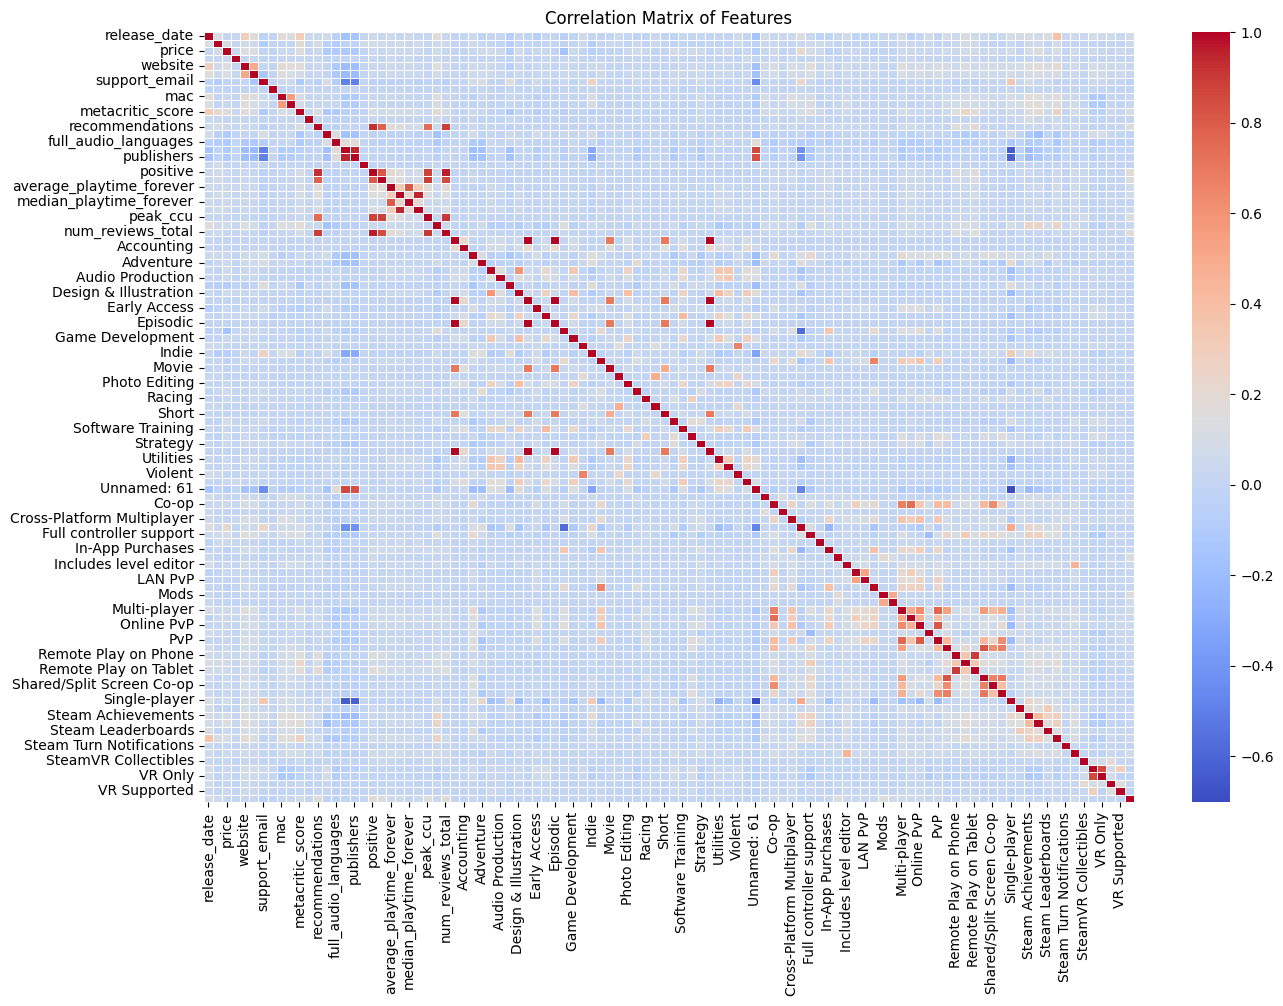

In [ ]:
# Оставляем только числовые столбцы
numerical_columns = df_processed.select_dtypes(include=['float64', 'int64', 'bool']).columns
numerical_columns=numerical_columns[1:len(numerical_columns)]
correlation_matrix = df_processed[numerical_columns].corr()

# Визуализируем корреляцию с помощью тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

Удаляем фичи без корреляции: ['user_score']
Количество признаков после обработки: 73
Новый DataFrame:
   release_date  required_age  price  dlc_count  website  support_email  \
0          4521             0   0.00          1        1              0   
1          2576             0   0.00          0        1              0   
2          4174             0   0.00          2        1              0   
3          3538            17   0.00          1        1              0   
4          3286            17  19.99          9        1              0   

   windows    mac  metacritic_score  achievements  recommendations  \
0     True  False                 0             1          4111974   
1     True  False                 0            37          1701431   
2     True   True                90             0            14329   
3     True  False                96            77          1641404   
4     True  False                 0             0          1090810   

   supported_languages  fu

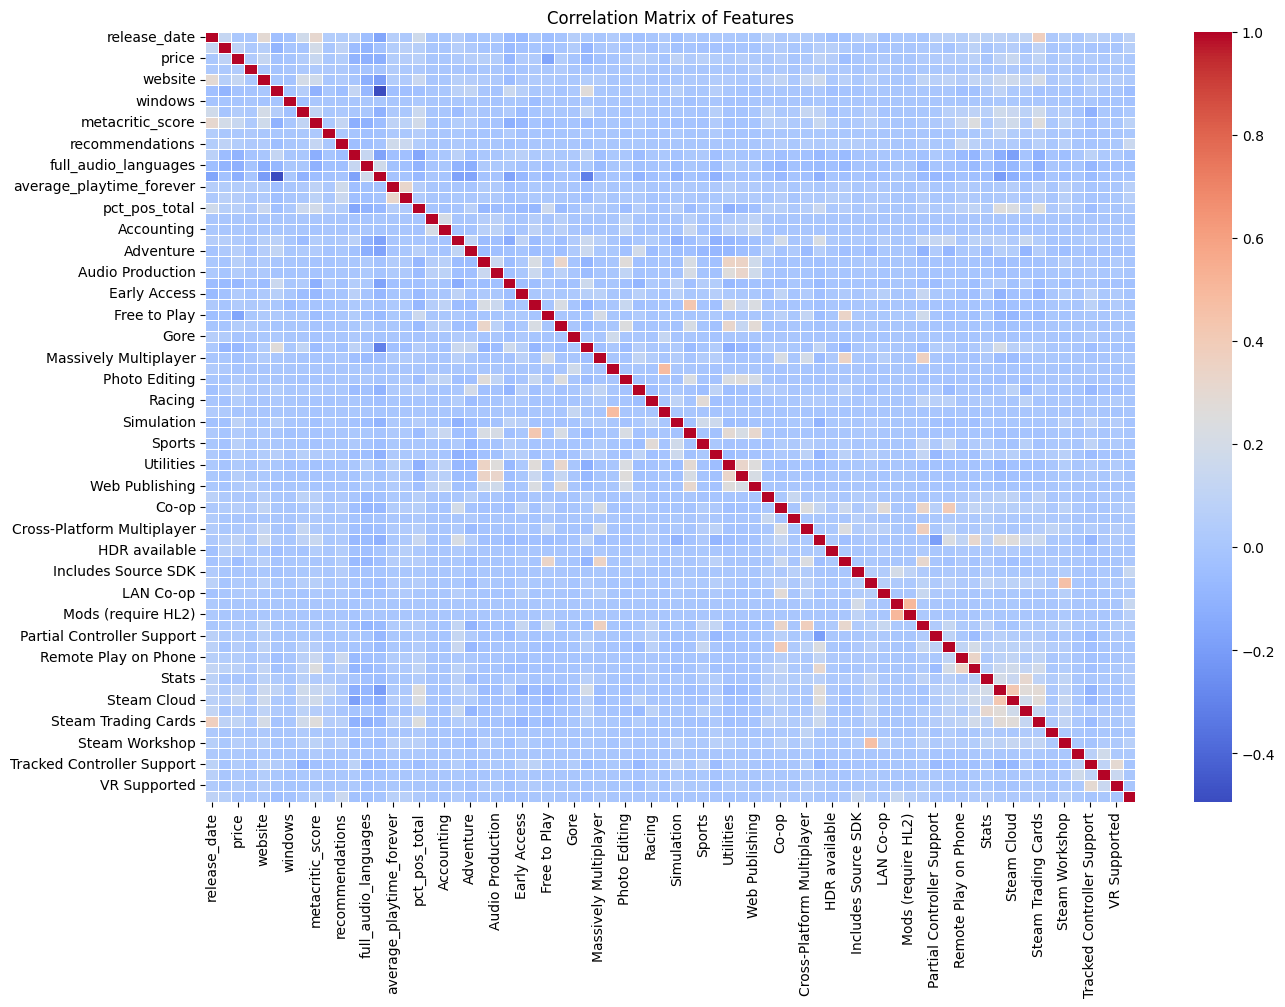

In [ ]:
# Порог для корреляции
threshold = 0.5

# Создаем копию датафрейма, чтобы удалять признаки
df_reduced = df_processed.copy()
df_reduced.drop(columns=['AppID'], inplace=True)

# Удаляем фичи с полной отсутствием корреляции
uncorrelated_features = correlation_matrix.columns[(correlation_matrix.abs().sum(axis=0) - 1) <= 0.5]
if not uncorrelated_features.empty:
    print(f"Удаляем фичи без корреляции: {list(uncorrelated_features)}")
    df_reduced.drop(columns=uncorrelated_features, inplace=True)

# Пересчитываем корреляционную матрицу после удаления некоррелирующих признаков
correlation_matrix = df_reduced.corr()

# Пока есть корреляции выше заданного порога
while True:
    # Находим индексы корреляций, превышающих порог
    high_corr = np.where(np.abs(correlation_matrix) > threshold)
    high_corr_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                       for i, j in zip(*high_corr) if i != j]

    # Если нет высоких корреляций, выходим из цикла
    if not high_corr_pairs:
        break

    # Выбираем пару с высокой корреляцией
    feature1, feature2 = high_corr_pairs[0]

    # Удаляем один из признаков (например, второй)
    if feature2 in df_reduced.columns:
        df_reduced.drop(columns=[feature2], inplace=True)

    # Пересчитываем корреляционную матрицу для оставшихся признаков
    correlation_matrix = df_reduced.corr()

df_reduced = pd.concat([df_reduced, df_processed['AppID']], axis=1)

# Выводим результат
print("Количество признаков после обработки:", df_reduced.shape[1])
print("Новый DataFrame:")
print(df_reduced.head())


# Визуализируем корреляцию с помощью тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()


In [ ]:
# Сохраняем обновленный датасет в новый файл
df_reduced.to_csv('/content/drive/My Drive/games_cleaned_filtered.csv', index=False)

print("Обновленный датасет сохранен в 'games_cleaned_filtered.csv'")

Обновленный датасет сохранен в 'games_cleaned_filtered.csv'


Этап уменьшения размерности:


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Загрузка данных
file_path = '/content/drive/My Drive/games_cleaned_filtered.csv'
df = pd.read_csv(file_path)

# Удаляем 'AppID', так как он не участвует в анализе
data_for_reduction = df_reduced.drop(columns=['AppID']).values

# Масштабирование данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_reduction)

# Уменьшение размерности с помощью PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Объясненная дисперсия
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

# Находим минимальное количество компонент, объясняющих 95% дисперсии
threshold = 0.95
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= threshold) + 1

print(f"Общая объяснённая дисперсия (суммарно): {cumulative_variance[-1]:.4f}")
print(f"Количество компонент для объяснения {threshold*100}% дисперсии: {num_components}")

# Применяем PCA с найденным числом компонент
pca = PCA(n_components=num_components)
reduced_data = pca.fit_transform(scaled_data)

# Сохраняем результат уменьшения размерности
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(num_components)])
reduced_df['AppID'] = df_reduced['AppID'].values

print("Этап уменьшения размерности завершён.")

Общая объяснённая дисперсия (суммарно): 1.0000
Количество компонент для объяснения 95.0% дисперсии: 65
Этап уменьшения размерности завершён.


In [ ]:
# Сохраняем обновленный датасет в новый файл
reduced_df.to_csv('/content/drive/My Drive/games_ym_raz.csv', index=False)

print("Обновленный датасет сохранен в 'games_cleaned_filtered.csv'")

Обновленный датасет сохранен в 'games_cleaned_filtered.csv'


In [ ]:
# Просмотр первых строк и структуры данных
print("Первая информация о датасете:")
print(reduced_df.head())
print("\nОписание данных:")
print(reduced_df.info())

Первая информация о датасете:
         PC1        PC2       PC3        PC4        PC5        PC6        PC7  \
0  29.714019  19.114113  9.168103 -42.312106  18.248323 -14.911071  20.636571   
1   9.990397   5.674709  5.456251 -15.366302   6.255266  -1.113708   6.180242   
2  11.403957   8.804952  6.550281 -13.840444   8.123341 -11.908038  11.622488   
3  16.026992   8.948646  1.134296 -20.649350   8.197499   0.827252  10.092538   
4   9.985815   5.231429  3.690925 -13.463840   5.034069   1.700418   5.708536   

         PC8        PC9       PC10       PC11       PC12       PC13  \
0  13.172287 -30.340745 -42.810210 -22.101196  88.724635 -18.560808   
1   4.214289  -9.050687 -12.571977  -6.141612  30.257452  -6.479154   
2   0.771386 -12.124203  -7.307416 -10.799716  20.536758 -15.468148   
3   4.006930 -14.004143 -18.313083  -6.708622  37.372873  -6.733147   
4   2.389744  -6.607529  -8.064955  -2.534731  19.927350  -2.821644   

        PC14       PC15       PC16       PC17       PC18

In [ ]:
# Загрузка данных
file_path = '/content/drive/My Drive/games_ym_raz.csv'
df = pd.read_csv(file_path)

# Удаляем 'AppID', так как он не участвует в анализе
df = df.drop(columns=['AppID'])

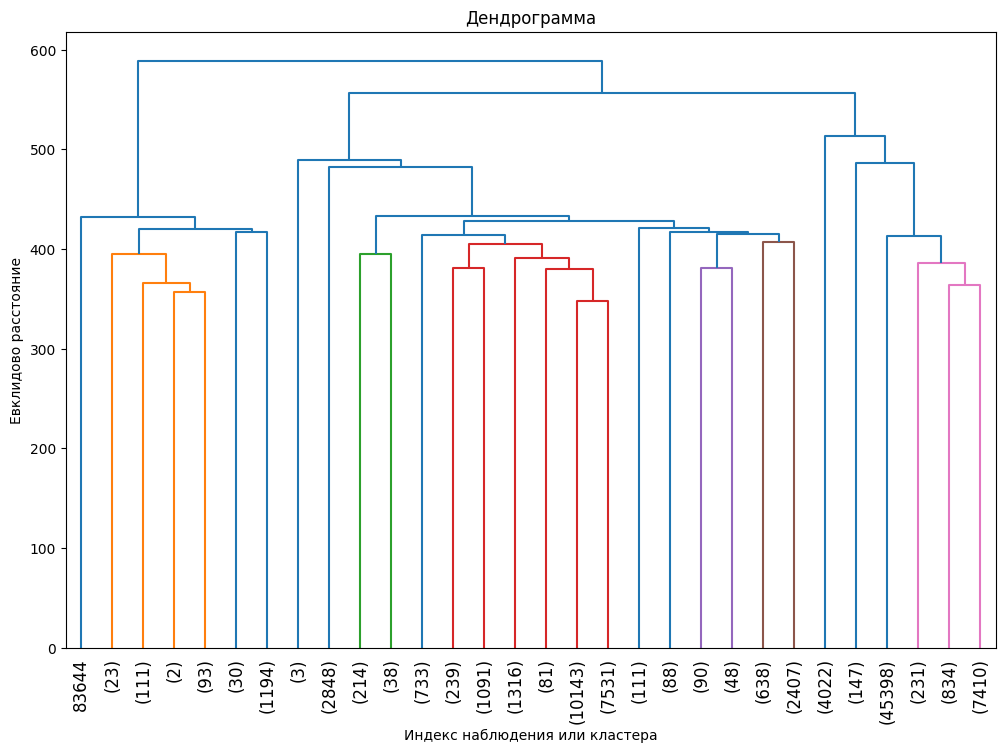

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Выполнение иерархической кластеризации
# 'ward' - метод минимизации дисперсии, подходит для большинства данных
linkage_matrix = linkage(df, method='ward')

# Построение дендрограммы
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12.)
plt.title("Дендрограмма")
plt.xlabel("Индекс наблюдения или кластера")
plt.ylabel("Евклидово расстояние")
plt.show()

In [ ]:
# Задание количества кластеров
n_clusters = 9  # Укажите предполагаемое количество кластеров
labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')

# Оценка качества кластеризации
silhouette_avg = silhouette_score(df, labels)
calinski_harabasz = calinski_harabasz_score(df, labels)
davies_bouldin = davies_bouldin_score(df, labels)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")

Silhouette Score: 0.056
Calinski-Harabasz Index: 2187.276
Davies-Bouldin Index: 2.186


In [ ]:
# Загрузка данных
file_path = '/content/drive/My Drive/games_ym_raz.csv'
games = pd.read_csv(file_path)

In [ ]:
# Удалим ненужные для модели колонки (например, name, так как это текстовый идентификатор)
features = games.drop(columns=['AppID'])  # 'AppID' — целевая переменная
target = games['AppID']

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Создаем модель Nearest Neighbors
knn_model = NearestNeighbors(n_neighbors=6, metric='euclidean')
knn_model.fit(features)

# Функция для рекомендации
def recommend_games_v1(game_id, data, model, n_recommendations=10):
    # Получаем фичи игры по ID
    game_features = data[data['AppID'] == game_id].drop(columns=['AppID'])
    if game_features.empty:
        return f"Игра с ID {game_id} не найдена!"

    # Находим соседей
    distances, indices = model.kneighbors(game_features, n_neighbors=n_recommendations+1)

    # Возвращаем рекомендованные ID игр
    recommended_ids = data.iloc[indices[0]]['AppID'].values[1:]  # Пропускаем саму игру
    return recommended_ids

In [ ]:
import joblib

# Сохранение модели в файл
joblib.dump(knn_model, 'nearest_neighbors_model.pkl')

['nearest_neighbors_model.pkl']

In [ ]:
# Тестируем на примере
game_id_to_recommend = 730  # Введите ID игры для теста
recommendations = recommend_games_v1(game_id_to_recommend, games, knn_model)
print(f"Рекомендованные игры для ID {game_id_to_recommend}: {recommendations}")

Рекомендованные игры для ID 730: [ 578080  271590  488822  105600  252490    4000  292030  431960 1091500
  553850]


In [ ]:
title=input("Название игры: ")
game_id_to_recommend = get_appid_by_name(title)
recommendations = recommend_games_v1(game_id_to_recommend, games, knn_model)
print(f"Рекомендованные игры для {get_name_by_appid(game_id_to_recommend)}:")
p=0
for i in recommendations:
  p=p+1
  print(p,') ',get_name_by_appid(i))

Название игры: Sid Meirs Civilization V
Рекомендованные игры для Sid Meier's Civilization® V:
1 )  Darkest Dungeon®
2 )  Inscryption
3 )  Disco Elysium - The Final Cut
4 )  Middle-earth™: Shadow of Mordor™
5 )  The Witcher: Enhanced Edition Director's Cut
6 )  Rakuen
7 )  Loop Hero
8 )  Anno 2070™
9 )  Space Run
10 )  Aarklash: Legacy


In [ ]:
# Загрузка данных
file_path = '/content/drive/My Drive/games_ym_raz.csv'
df = pd.read_csv(file_path)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
# Подготовка данных
# df - ваш DataFrame с характеристиками игр
# 'id' - столбец с ID игры
# Остальные 65 столбцов - фичи игры
game_ids = df['AppID']
features = df.drop(columns=['AppID'])

# Вычисление сходства (например, косинусное сходство)
similarity_matrix = cosine_similarity(features)

# Функция для получения рекомендаций
def recommend_games_v2(game_id, similarity_matrix, game_ids, top_n=10):
    # Находим индекс игры по ID
    game_index = game_ids[game_ids == game_id].index[0]

    # Сходства данной игры со всеми остальными
    similarities = similarity_matrix[game_index]

    # Сортировка по убыванию сходства
    similar_games = np.argsort(similarities)[::-1]

    # Исключаем саму игру из рекомендаций
    similar_games = [i for i in similar_games if i != game_index]

    # Получаем топ-N похожих игр
    recommended_ids = game_ids.iloc[similar_games[:top_n]].values
    return recommended_ids

In [ ]:

# Пример использования
game_id = 730  # Замените на существующий ID игры
top_10_recommendations = recommend_games_v2(game_id, similarity_matrix, game_ids, top_n=10)

print(f"Рекомендации для игры с ID {game_id}: {top_10_recommendations}")


Рекомендации для игры с ID 730: [ 271590  578080  105600  488822  292030 1091500 1966720  553850 1245620
  648800]


In [ ]:
title="GTA V"
game_id_to_recommend = get_appid_by_name(title)
recommendations = recommend_games_v2(game_id, similarity_matrix, game_ids, top_n=10)
print(f"Рекомендованные игры для {get_name_by_appid(game_id_to_recommend)}:")
p=0
for i in recommendations:
  p=p+1
  print(p,') ',get_name_by_appid(i))

Рекомендованные игры для Grand Theft Auto V:
1 )  Grand Theft Auto V
2 )  PUBG: BATTLEGROUNDS
3 )  Terraria
4 )  Tom Clancy's Rainbow Six® Siege
5 )  The Witcher® 3: Wild Hunt
6 )  Cyberpunk 2077
7 )  Lethal Company
8 )  HELLDIVERS™ 2
9 )  ELDEN RING
10 )  Raft
